<a href="https://colab.research.google.com/github/ajaymathew522/TheSparksFoundationInternship/blob/master/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

Loading the iris dataset and storing it into a pandas dataframe

In [ ]:
ds = datasets.load_iris()
data = pd.DataFrame(ds.data, columns=ds.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Trying to find the optimal number of clusters by plotting the inertia of KMeans models with different number of clusters

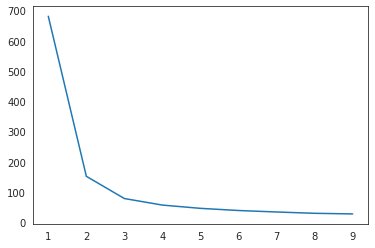

In [ ]:
iner = []
for i in range(1,10):
  km = KMeans(n_clusters=i)
  km.fit(data)
  iner.append(km.inertia_)

sns.set_style('white')

sns.lineplot(range(1,10), iner)
plt.show()

We can choose the number of clusters in our models as 3, as it is the elbow point in the graph

Creating a model with KMeans estimator

In [ ]:
p_grid = {'init':['k-means++', 'random'],'copy_x':[True, False],'algorithm':['full', 'elkan']}
model = GridSearchCV(KMeans(n_clusters=3),param_grid=p_grid, cv=5)

Fitting and predicting the cluster labels for the data

In [ ]:
model.fit(data)
y_pred = model.predict(data)
model.best_estimator_

KMeans(algorithm='full', copy_x=False, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Adding cluster column to the data

In [ ]:
data['cluster'] = pd.Series(y_pred, index=data.index)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Plotting a sctter plot of sepal length vs width with color as cluster lablels. Cluster centers are denoted by the red crosses.

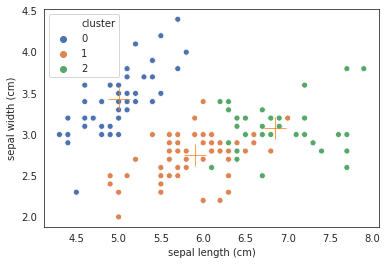

In [ ]:
sns.scatterplot(x=data.iloc[:,0], y=data.iloc[:,1], hue='cluster', data=data, palette='deep')
sns.scatterplot(model.best_estimator_.cluster_centers_[:,0], model.best_estimator_.cluster_centers_[:,1], marker='+', s=500)
plt.show()